In [ ]:
#connect drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [ ]:
# fraction of sample pass to the train and test as example
SAMPLE_FRAC = 0.2
# 80% data for training and 20% data for validate
TRAIN_FRAC = 0.8
# load train data from train.csv
train = pd.read_csv("drive/MyDrive/Colab_Notebooks/Amazon_reviews/data_ready.csv")
train = train.drop(columns=['Unnamed: 0'])
train = train.reset_index(drop=True)
# change sentiment label form 'pos' and 'neg' to 1 and 0, which bert model knows
train['label'].replace({'positive':1,'negative':0},inplace=True)

# train set
train_sample = train.sample(frac=SAMPLE_FRAC,random_state=0)
train_csv = train_sample.sample(frac= TRAIN_FRAC,random_state=0)

# validate set 
validate_csv = train_sample.drop(index=train_select.index)

# load test data , here should be validation set
test = pd.read_csv("drive/MyDrive/Colab_Notebooks/Amazon_reviews/data_ready.csv")
test = test.drop(columns=['Unnamed: 0'])
test = test.reset_index(drop=True)
test['label'].replace({'positive':1,'negative':0},inplace=True)
test_csv = test.sample(frac=SAMPLE_FRAC,random_state=0)

In [ ]:
train_texts = []
train_labels = []
test_texts = []
test_labels =[]

for index, row in train_csv.iterrows():
  train_texts.append(row[0])
  train_labels.append(row[1])

for index, row in test_csv.iterrows():
  test_texts.append(row[0])
  test_labels.append(row[1])

In [ ]:
len(train_texts) ,  len(train_labels)

(98817, 98817)

In [ ]:
baseline_model = make_pipeline(CountVectorizer(ngram_range=(1,3)), LogisticRegression()).fit(train_texts, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
baseline_predicted = baseline_model.predict(test_texts)

In [ ]:
print(classification_report(test_labels, baseline_predicted))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96     11609
           1       0.99      1.00      1.00    111912

    accuracy                           0.99    123521
   macro avg       0.99      0.97      0.98    123521
weighted avg       0.99      0.99      0.99    123521



In [ ]:
def visualize_confusion_matrix(y_pred_argmax, y_true):
    """

    :param y_pred_arg: This is an array with values that are 0 or 1
    :param y_true: This is an array with values that are 0 or 1
    :return:
    """

    cm = tf.math.confusion_matrix(y_true, y_pred_argmax).numpy()
    con_mat_df = pd.DataFrame(cm)
    
    print(classification_report(y_pred_argmax, y_true))

    sns.heatmap(con_mat_df, annot=True, fmt='g', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     11192
           1       1.00      0.99      1.00    112329

    accuracy                           0.99    123521
   macro avg       0.97      0.99      0.98    123521
weighted avg       0.99      0.99      0.99    123521



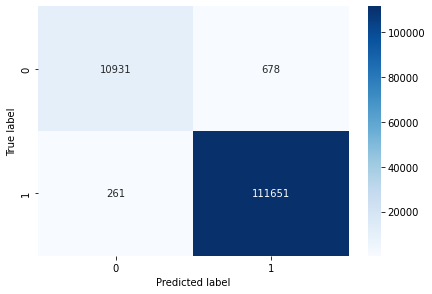

In [ ]:
visualize_confusion_matrix(baseline_predicted,test_labels)